Basé sur la vidéo : https://www.youtube.com/watch?v=bte8Er0QhDg

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
# You can either run this cell or the next one which loads the model already trained

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

model.save('handwritten.model')

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2655 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1087 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0745 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0417 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0260 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

INFO:tensorflow:Assets written to: handwritten.model/assets


In [7]:
# Run this cell if the previous one hadn't 

model = tf.keras.models.load_model('handwritten.model')

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0983 - accuracy: 0.9762


shape : (28, 28)
shape : (1, 28, 28)
1/1 [==============================] - 0s 14ms/step


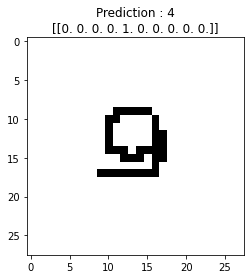

shape : (28, 28)
shape : (1, 28, 28)
1/1 [==============================] - 0s 19ms/step


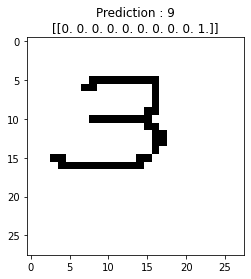

shape : (28, 28)
shape : (1, 28, 28)
1/1 [==============================] - 0s 20ms/step


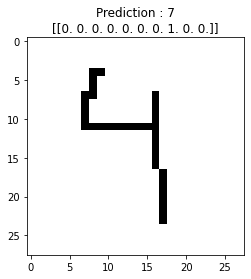

shape : (28, 28)
shape : (1, 28, 28)
1/1 [==============================] - 0s 17ms/step


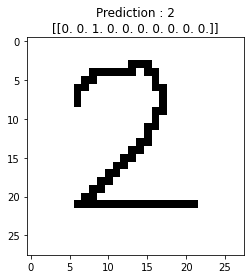

In [10]:
cpt = 1
while os.path.isfile(f"chiffres/chiffre{cpt}.png"):
    img = cv2.imread(f"chiffres/chiffre{cpt}.png")[:,:,0]
    print(f"shape : {img.shape}")
    img = np.invert(np.array([img]))
    print(f"shape : {img.shape}")
    prediction = model.predict(img)
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.title(f"Prediction : {np.argmax(prediction)}\n{prediction}")
    plt.show()
    cpt += 1
    if cpt == 5:
        break